<a href="https://colab.research.google.com/github/KanthaAnanya/OIBSIP_task1/blob/main/IrisClassification_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import all the required libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# importing the dataset
columns=['Id','SepalLengthCm','SepalWidthCm	','PetalLengthCm','PetalWidthCm','Species']
iris=pd.read_csv("/content/Irisdataset.csv")
# returns first 5 rows of the dataset
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#returns last 5 rows of the dataset
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
#returns a tuple representing the dimensionalitymof the dataset
iris.shape

(150, 6)

In [ ]:
iris=iris.drop(columns=['Id'])  #to delete a column
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# returns description of the data in the dataset
iris.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
iris.info()    # to display information about datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.isnull().sum()   #return true or false


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
iris.dtypes         #to find data types of the columns

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
#Plots

<Axes: >

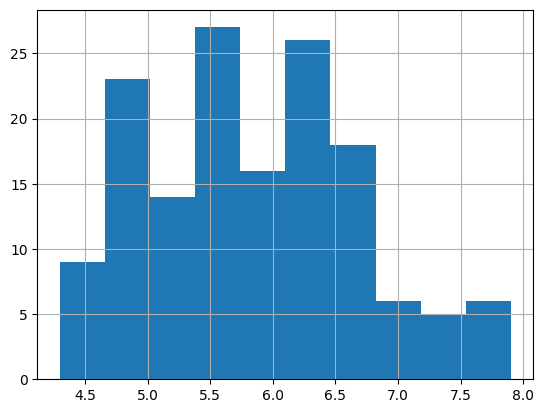

In [ ]:
iris['SepalLengthCm'].hist()

<Axes: >

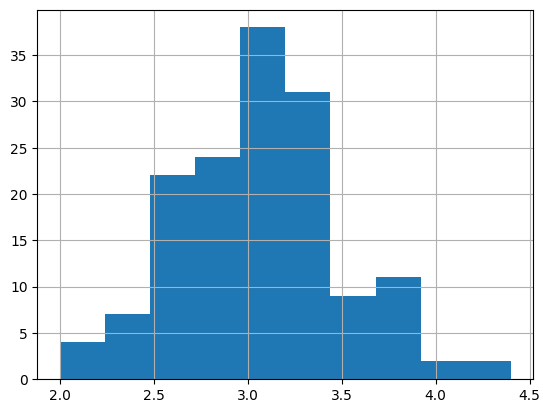

In [ ]:
iris['SepalWidthCm'].hist()

<Axes: >

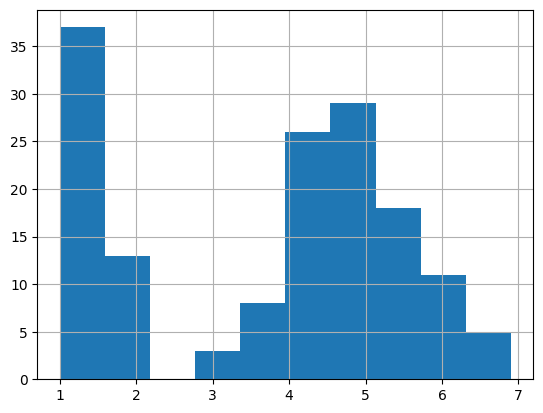

In [ ]:
iris['PetalLengthCm'].hist()

<Axes: >

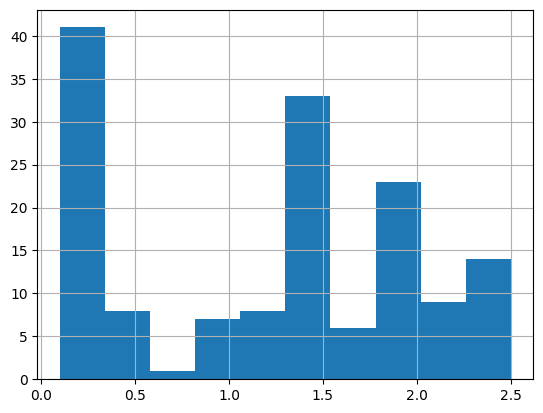

In [ ]:
iris['PetalWidthCm'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f898bb11ba0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f898bb120e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f898bb11900>],
 'medians': [<matplotlib.lines.Line2D at 0x7f898bb12620>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f898bb128c0>],
 'means': []}

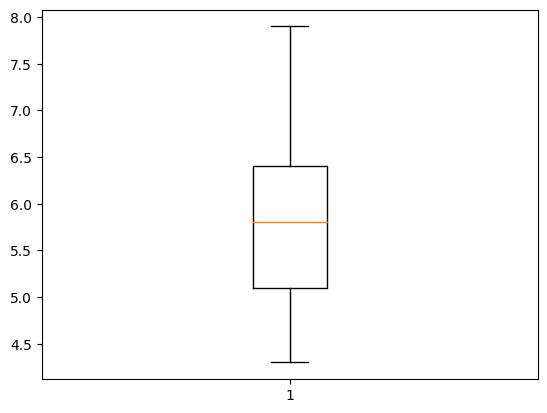

In [ ]:
plt.boxplot(iris['SepalLengthCm'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f898c4a64d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f898c4a6a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f898c4a6230>],
 'medians': [<matplotlib.lines.Line2D at 0x7f898c4a6f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f898c4a71f0>],
 'means': []}

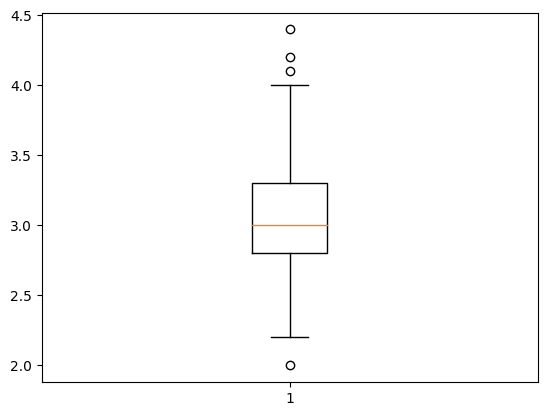

In [ ]:
plt.boxplot(iris['SepalWidthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f898c521450>,
 'caps': [<matplotlib.lines.Line2D at 0x7f898c521990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f898c5211b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f898c521ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f898c507310>],
 'means': []}

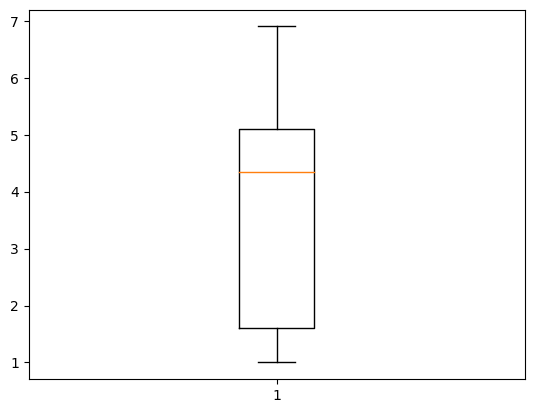

In [ ]:
plt.boxplot(iris['PetalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc6ff29f370>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6ff29c280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc6ff29d7b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc6ff29c3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc6ff29d3c0>],
 'means': []}

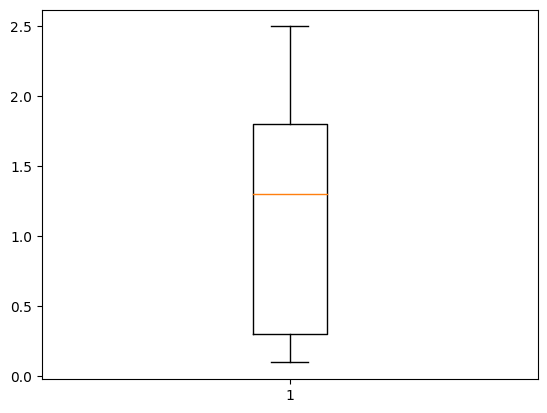

In [ ]:
plt.boxplot(iris['PetalWidthCm'])

In [ ]:
colors=['yellow','purple','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

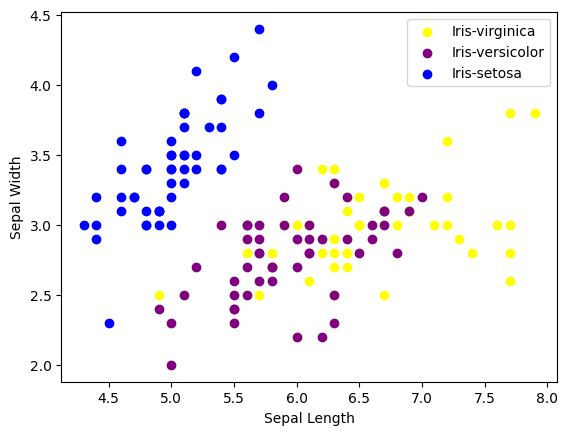

In [ ]:
for i in range(3):
  x=iris[iris['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'] ,c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

plt.legend()

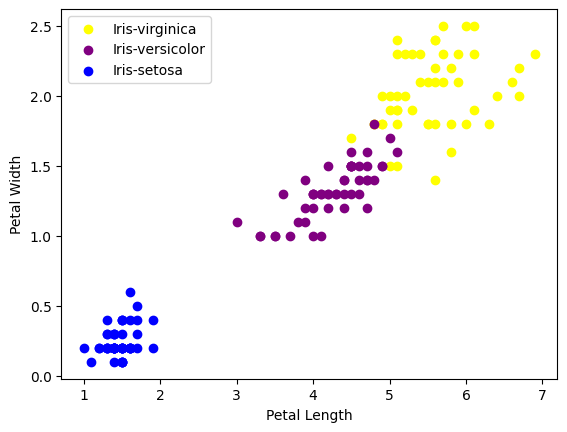

In [ ]:
for i in range(3):
  x=iris[iris['Species']==species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

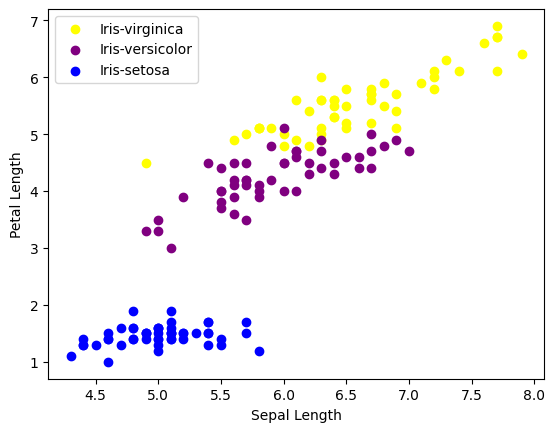

In [ ]:
for i in range(3):
  x=iris[iris['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

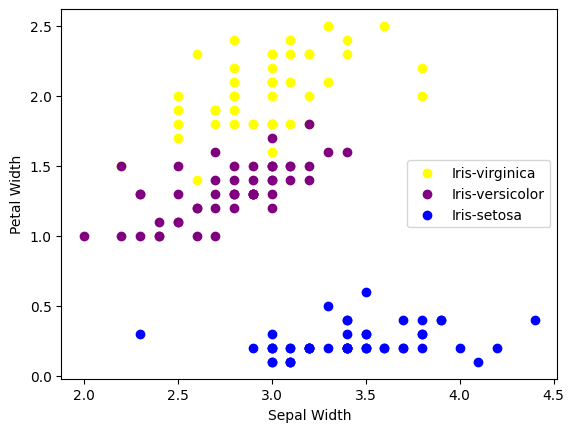

In [ ]:
for i in range(3):
  x=iris[iris['Species']==species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [ ]:
#To show correlation coefficient between variables.
#Each cell in the below taable shows the correlation between 2 variables.
#the range of the value is -1 to 1. If 2 variables have hig correlation,we can neglect one of the variable from those two variables.
iris.corr()

<ipython-input-74-b4b36c8efaad>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<ipython-input-75-73ae3ac5e32e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=iris.corr()


<Axes: >

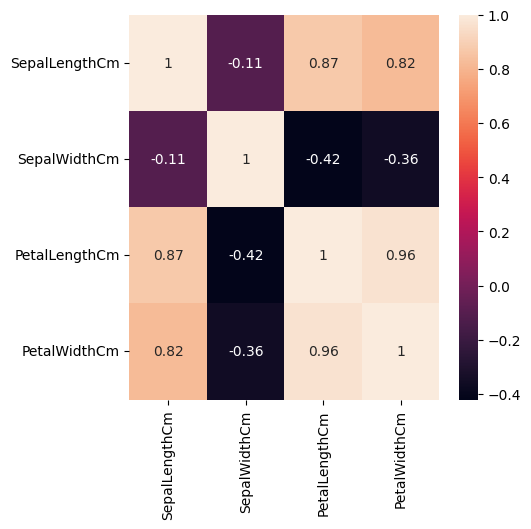

In [ ]:
corr=iris.corr()
fig, ax=plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=ax)

In [ ]:
#Label Encoding is used to convert the labels into numeric form so that we can convert it into the machine-readable form
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
iris['Species']=le.fit_transform(iris['Species'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# import train_test_split function
from sklearn.model_selection import train_test_split
feature_cols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']  #or we can write it as X=iris.iloc[:,:4] ,it means all rows and 4 columns
X=iris[feature_cols]
y=iris['Species']  #we can write it as Y=iris.iloc[:,-1], it gives the last column which is Species
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=0)

In [ ]:
X.head() #shows first five records of input vaiable X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head() #shows first five records of output variable Y

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [ ]:
X=preprocessing.StandardScaler().fit_transform(X)
X[0:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

In [ ]:
#Builing the model
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)
y_pred=knnmodel.predict(X_test)

In [ ]:
#Evaluating the algorithm
from sklearn.metrics import confusion_matrix
confusionmatrix=confusion_matrix(y_test,y_pred)
print(confusionmatrix)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print(y_pred)
print(metrics.accuracy_score(y_test,y_pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
0.9777777777777777
